# Some basic info about this dataset
- Has 4 Junction

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta, date
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv('../Dataset/another_dataset/traffic.csv', parse_dates=True, index_col='DateTime')
df.head()

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041


**Some describe in this dataset**

In [4]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


**Extract Year, Month, Day, Hour** from **index**
- I split Year, Month, Day, Hour from data for plotting purpose

In [5]:
# extract year from date
df['Year'] = pd.Series(df.index).apply(lambda x: x.year).to_list()

# extract month from date
df['Month'] = pd.Series(df.index).apply(lambda x: x.month).to_list()

# extract day from date
df['Day'] = pd.Series(df.index).apply(lambda x: x.day).to_list()

# extract hour from date
df['Hour'] = pd.Series(df.index).apply(lambda x: x.hour).to_list()

**Drop the ID column**
I think ID does not effect to this dataset, so just drop it!

In [6]:
df.drop('ID', axis=1, inplace=True)

**Z Score data distribution and Histogram with Z Score Vehicles form Data**
- Mean = 0
- Standard Deviation = 1

In [7]:
standardization = lambda x: StandardScaler().fit_transform(x)

In [8]:
z_df = df.copy()
z_df['Vehicles'] = standardization(z_df.Vehicles.values.reshape(-1, 1))
z_df.head()

,Junction,Vehicles,Year,Month,Day,Hour
DateTime,,,,,,
2015-11-01 00:00:00,1,-0.375489,2015,11,1,0
2015-11-01 01:00:00,1,-0.471875,2015,11,1,1
2015-11-01 02:00:00,1,-0.616454,2015,11,1,2
2015-11-01 03:00:00,1,-0.761034,2015,11,1,3
2015-11-01 04:00:00,1,-0.664648,2015,11,1,4


In [9]:
def get_list_data(dataf, drop=[]):
  # drop cột DateTime ở các data
  for i in drop:
    try:
      dataf.drop(drop, axis=1, inplace=True)
    except:
      print(f"{i} doesn't has in data")
  # create a list of dataframe has the data in that junction and remove the junction identify
  dataf = [dataf[dataf.Junction == i].drop('Junction', axis=1) for i in range(5)]
  return dataf

In [10]:
data = get_list_data(df)
for i in data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01        15  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         6  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01         9  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01         3  2017      1    1     0


**Auto correlation plot**
- The data lie outside the blue has 95% effect to data

In [11]:
def make_autocorrelation(junction=1):
    f, ax = plt.subplots(figsize=(17, 6), nrows=2)
    plot_acf(data[junction].Vehicles, title=f"Autocorrelation of amounts of Vehicles in Junction {junction}", ax=ax[0])
    plot_pacf(data[junction].Vehicles, title=f"Partial Autocorrelation of amounts of Vehicles Junction {junction}", ax=ax[1])
    plt.show()

**Create a make metrics function to return R² Score and RMSE from a list of models**

In [12]:
def make_metrics(models):
    data = {
        'name': [model.name for model in models[1:]],
        'r2': [model.r2 for model in models[1:]],
        'rmse': [model.rmse for model in models[1:]]
    }
    data['name'] = 'average R2 and sum RMSE'
    data['r2'].append(np.mean(data['r2']))
    data['rmse'].append(np.sum(data['rmse']))
    return pd.DataFrame(data)

**Create a function to create a new dataset**

In [13]:
z_data = get_list_data(z_df)
for i in z_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Year, Month, Day, Hour]
Index: []
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.375489  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.809227  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2015-11-01 -0.664648  2015     11    1     0
            Vehicles  Year  Month  Day  Hour
DateTime                                    
2017-01-01 -0.953806  2017      1    1     0


**Create a class for a frame for machine learning model**

In [14]:
class Model:
  def __init__(self, name, data, predict_features, test_size, ml_model):
    self.name = name
    self.data = data
    self.predict_features = predict_features
    self.is_trained = False
    self.test_size = test_size
    self.ml_model = ml_model
    self.do_things()

  def cal_rmse(self):
    self.rmse = mean_squared_error(self.ytest, self.ypredict, squared=False)
    return self.rmse

  def prequisite(self, test_size):
    self.features = [i for i in self.data.columns if i != self.predict_features]
    self.X = self.data[self.features].values
    self.y = self.data[self.predict_features].values
    self.Xtrain, self.Xtest, self.ytrain, self.ytest = train_test_split(self.X, self.y, test_size=test_size)
    return None

  def fit(self):
    self.is_trained = True
    self.ml_model.fit(self.Xtrain, self.ytrain)
    self.ypredict = self.ml_model.predict(self.Xtest)
    return self.ml_model

  def cal_r2_score(self):
    self.r2 = r2_score(self.ytest, self.ypredict)
    return self.r2

  def do_things(self) -> None:
    self.prequisite(self.test_size)
    self.fit()
    self.cal_rmse()
    self.cal_r2_score()
    return None

  def feature_importances(self, ax) -> None:
    feature_importances = self.ml_model.feature_importances_
    index = lag_models[1].features
    data = pd.DataFrame(pd.Series(feature_importances, index=index).nlargest(10)).reset_index()
    data.columns = ['Features', 'Value']
    g = sns.barplot(data=data, x='Features', y='Value', ax=ax)
    for p in g.patches:
        ax.annotate(
            format(p.get_height(), '.2f'),
            (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),
            ha='center', va='center', weight='bold', fontsize=9
        )
    ax.set_title(f'Plot of {self.name}', fontsize=12)
    ax.grid(True, ls='-.', alpha=0.7)
    ax.set_ylim(0, 1)

  def __repr__(self) -> str:
    if not self.is_trained:
      return f'<{self.name}> (is not trained yet)>'
    return f'<({self.name}: [R² Score: {self.r2}], [RMSE: {self.rmse}])>'

**Training models for 4 junction with normal data**

In [26]:
from sklearn.tree import DecisionTreeRegressor
# from sklearn import linear_model
models = [None]
for i in range(1, 5):
    models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]
    
make_metrics(models)

,name,r2,rmse
0,average R2 and sum RMSE,0.942272,5.456337
1,average R2 and sum RMSE,0.855714,2.778131
2,average R2 and sum RMSE,0.723308,5.475791
3,average R2 and sum RMSE,0.473559,2.546307
4,average R2 and sum RMSE,0.748713,16.256566


**Training models for 4 junction with Z Score Normalization**

In [16]:
z_models = [None]
for i in range(1, 5):
    z_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i}',
            data=z_data[i],
            predict_features='Vehicles',
            test_size=1/4
        )
    ]

make_metrics(z_models)

,name,r2,rmse
0,average R2 and sum RMSE,0.939204,0.265728
1,average R2 and sum RMSE,0.864551,0.130700
2,average R2 and sum RMSE,0.744297,0.251810
3,average R2 and sum RMSE,0.490846,0.120246
4,average R2 and sum RMSE,0.759725,0.768483


**Create lag data**

In [17]:
lag_df = df.copy()
for i in range(1, 3):
    lag_df[f'Vehicles_lag_{i}'] = df.Vehicles.shift(i)

# drop all rows with nan, because lag data cause nan
lag_df.dropna(inplace=True)
lag_df.head()

,Junction,Vehicles,Year,Month,Day,Hour,Vehicles_lag_1,Vehicles_lag_2
DateTime,,,,,,,,
2015-11-01 02:00:00,1,10,2015,11,1,2,13.0,15.0
2015-11-01 03:00:00,1,7,2015,11,1,3,10.0,13.0
2015-11-01 04:00:00,1,9,2015,11,1,4,7.0,10.0
2015-11-01 05:00:00,1,6,2015,11,1,5,9.0,7.0
2015-11-01 06:00:00,1,9,2015,11,1,6,6.0,9.0


In [18]:
lag_data = get_list_data(lag_df, drop=['Year'])
for i in lag_data:
    print(i.head(1))

Empty DataFrame
Columns: [Vehicles, Month, Day, Hour, Vehicles_lag_1, Vehicles_lag_2]
Index: []
                     Vehicles  Month  Day  Hour  Vehicles_lag_1  \
DateTime                                                          
2015-11-01 02:00:00        10     11    1     2            13.0   

                     Vehicles_lag_2  
DateTime                             
2015-11-01 02:00:00            15.0  
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         6     11    1     0            78.0            84.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2015-11-01         9     11    1     0            27.0            29.0
            Vehicles  Month  Day  Hour  Vehicles_lag_1  Vehicles_lag_2
DateTime                                                              
2017-01-01         3

**Lag data is appropriate for time series data, use for create the auto correlation**

In [19]:
lag_models = [None]
for i in range(1, 5):
    lag_models += [
        Model(
            ml_model=RandomForestRegressor(),
            name=f'Dataset of junction {i} with lag data',
            data=lag_data[i],
            predict_features='Vehicles',
            test_size=1/3
        )
    ]

make_metrics(lag_models)

,name,r2,rmse
0,average R2 and sum RMSE,0.969804,3.985213
1,average R2 and sum RMSE,0.883204,2.535016
2,average R2 and sum RMSE,0.752777,4.953571
3,average R2 and sum RMSE,0.453455,2.611527
4,average R2 and sum RMSE,0.764810,14.085328


**Feature importances of a model**

*The correlate value as close as 1 is best*

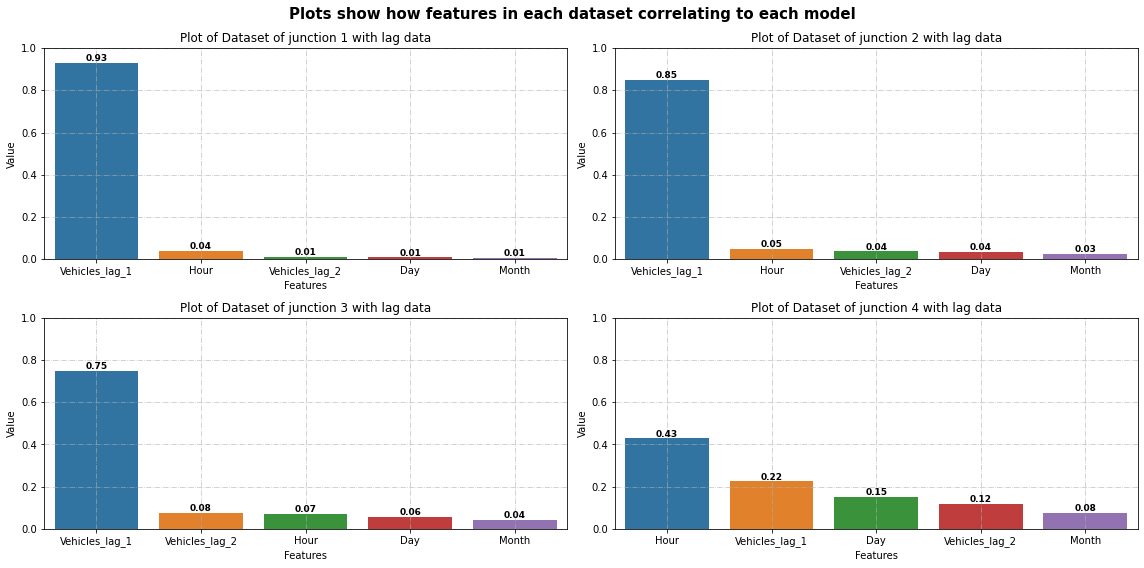

In [20]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
k = 1
for i in range(2):
    for j in range(2):
        lag_models[k].feature_importances(ax[i, j])
        k += 1
f.suptitle('Plots show how features in each dataset correlating to each model', fontsize=15, fontweight='bold')        
f.tight_layout()

**Predict for next 4 months**

I predict for each Junction separately. I use previous prediction amounts of Vehicles for predicting next amounts of Vehicles.

In [21]:
for junction in range(1, 5):
    cur_time = lag_data[junction].tail(1).index[0] # get the current time, the last time of that dataset
    end_time = pd.Timestamp(2017, 11, 1, 0, 0, 0) # the end time after 4 months that we want to predict
    new_data = lag_data[junction].copy() # create a copy of dataset with that junction
    features = lag_models[junction].features # get features of each models in that junction
    while cur_time != end_time:
        last = new_data.tail(1).copy() # get the last row of dataset, just make a copy!
        new_data = pd.concat([new_data, last]) # concatenate the copy dataset with it's last row
        for i in range(1, 3): # create lag data
            new_data[f'Vehicles_lag_{i}'] = new_data.Vehicles.shift(i) # shift by periods i
        new_data.iloc[len(new_data) - 1, [1, 2, 3]] = [cur_time.month, cur_time.day, cur_time.hour] # assign value for those columns
        last = new_data[features].tail(1).values # create a new last data that drop all nan
        new_data.iloc[len(new_data) - 1, 0] = round(lag_models[1].ml_model.predict(last)[0]) # predicting for vehicles
        cur_time += timedelta(hours=1) # add to a cur_time 1 hour
    new_data.index = pd.date_range(
        start=lag_data[junction].head(1).index.values[0],
        end=pd.Timestamp(2017, 11, 1, 0, 0, 0),
        freq='H'
    ) # reassign index with the new time range with start is the start of data
      # and end time is the end time that initialize in start of the loop
    new_data.to_csv(f'vehicles_for_next_4_months_in_junction_{junction}.csv') # to csv that file
    print(f'|==Predicted for Junction {junction}==|')

|==Predicted for Junction 1==|
|==Predicted for Junction 2==|
|==Predicted for Junction 3==|
|==Predicted for Junction 4==|


# Conclusion
The highest RMSE is about 5.6, so when using last amounts of Vehicles to predict next hour amounts of Vehicles seem like that RMSE is raising. You guys can puts a review of your own into the comments section below. Be honest, i'm very newbie, so if has something may not right in my kernel, you can tell me about that, i'm very appreciate about that. Thanks for reading my kernel!